In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 20,7

In [2]:
df = pd.read_csv('Video_Games_Sales.csv')

In [3]:
print(df.shape)

(16719, 16)


In [4]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# полностью исследуем датафрейм и поправим недочеты
df.info()
# что видим?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [7]:
# почему в User_Score object?
df['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [8]:
# заменим tbd на nan
df['User_Score'] = df['User_Score'].replace('tbd', np.NaN)
df['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [9]:
# исправим типы данных
df['Year_of_Release'] = df['Year_of_Release'].astype('Int64')
df['User_Count'] = df['User_Count'].astype('Int64')
df['User_Score'] = df['User_Score'].astype('float64')
df['Critic_Count'] = df['Critic_Count'].astype('Int64')

# # переводим оценки в один формат
df['User_Score'] = df['User_Score'] * 10

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  Int64  
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   Int64  
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   Int64  
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: Int64(3), float64(7), object(6)
memory usage: 2.1+ MB


#Построим график динамики продаж видеоигр


In [11]:
dynamics_by_region = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Year_of_Release']] \
    .groupby('Year_of_Release').sum()
dynamics_by_region

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year_of_Release,,,,,
1980,10.59,0.67,0.00,0.12,11.38
1981,33.40,1.96,0.00,0.32,35.77
1982,26.92,1.65,0.00,0.31,28.86
1983,7.76,0.80,8.10,0.14,16.79
1984,33.28,2.10,14.27,0.70,50.36
1985,33.73,4.74,14.56,0.92,53.94
1986,12.50,2.84,19.81,1.93,37.07
1987,8.46,1.41,11.63,0.20,21.74
1988,23.87,6.59,15.76,0.99,47.22


Text(0, 0.5, 'Продажи, млн.')

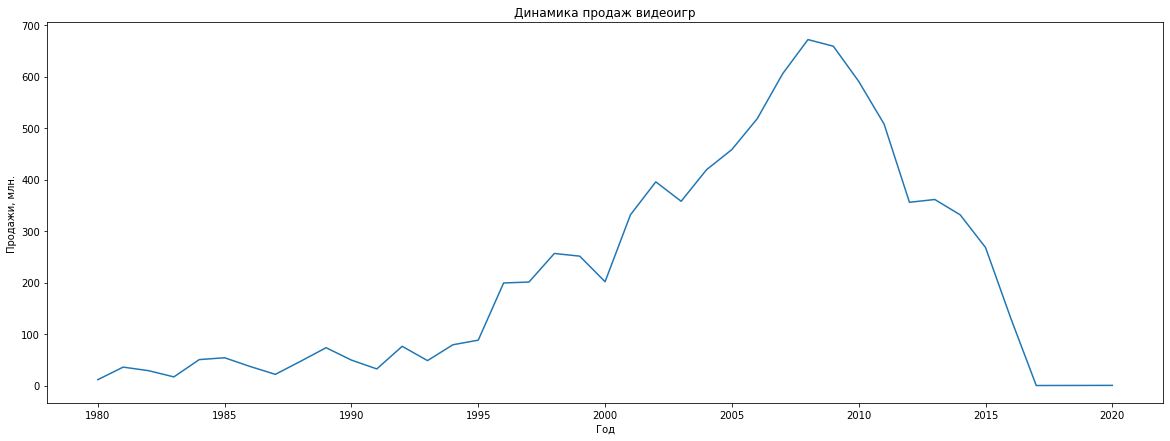

In [44]:
plt.plot(dynamics_by_region.index, dynamics_by_region['Global_Sales'])
plt.title('Динамика продаж видеоигр')
plt.xlabel('Год')
plt.ylabel('Продажи, млн.')

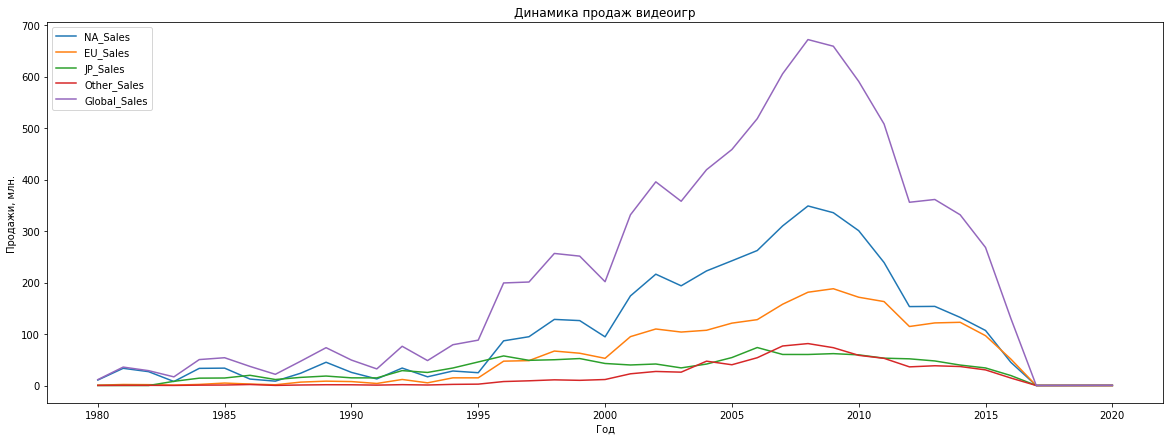

In [45]:
dynamics_by_region.plot(title='Динамика продаж видеоигр', 
                             xlabel='Год', 
                             ylabel='Продажи, млн.')
plt.legend(loc='upper left')

Краткий вывод.

Исходя из графика мы видим, что продажи игр растут не всегда. А даже если и растут, то темпы роста неравномерны. В период с 1990 по 2000 года продажи выросли более чем в 3 раза, примерно с 75 до 250 млн копий. А в период с 2000 по конец нулевых более чем в 2.5 раза, с 250 до более 700 млн. копий на пике. Далее мы видим постепенный спад продаж с резким обрушением графика к 2016 году, т.к. в данном датасете представлена информация до 2016 года

# Сравним распределение годов релиза игр и продажи

Text(0.5, 1.0, 'Распределение годов релиза игр')

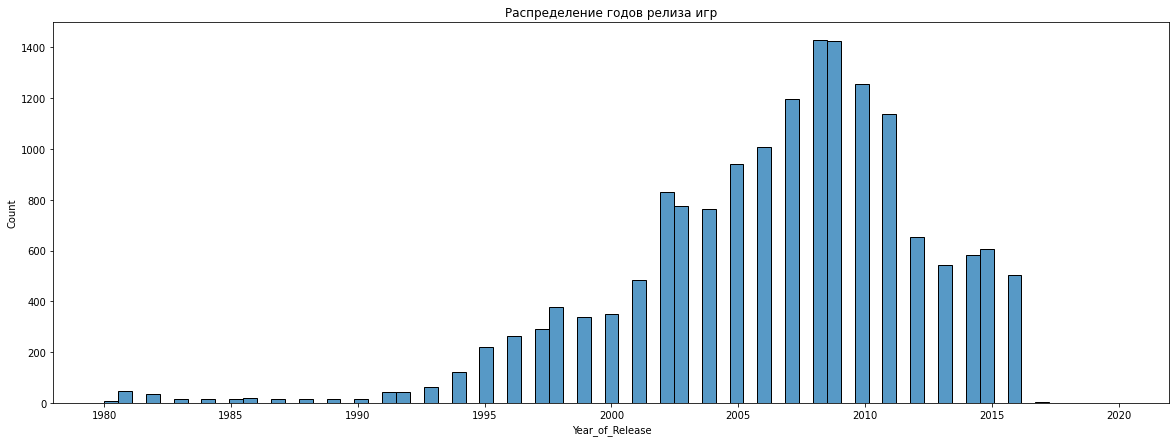

In [68]:
# распределение годов релиза игр
sns.histplot(df['Year_of_Release'])
plt.title('Распределение годов релиза игр')

Краткий вывод. 

Исходя из графика, мы можем увидеть, что количество выпущенных игр в период с начала 2000-х значительно выше, чем в период до начала 21 века. Также мы видим, что самым "плодотворным на релизы" был период с середины нулевых до начала десятых годов. Далее произошел спад до уровня примерно 2002-2005 годов.

Text(0.5, 1.0, 'Сравнение годов релиза и продаж')

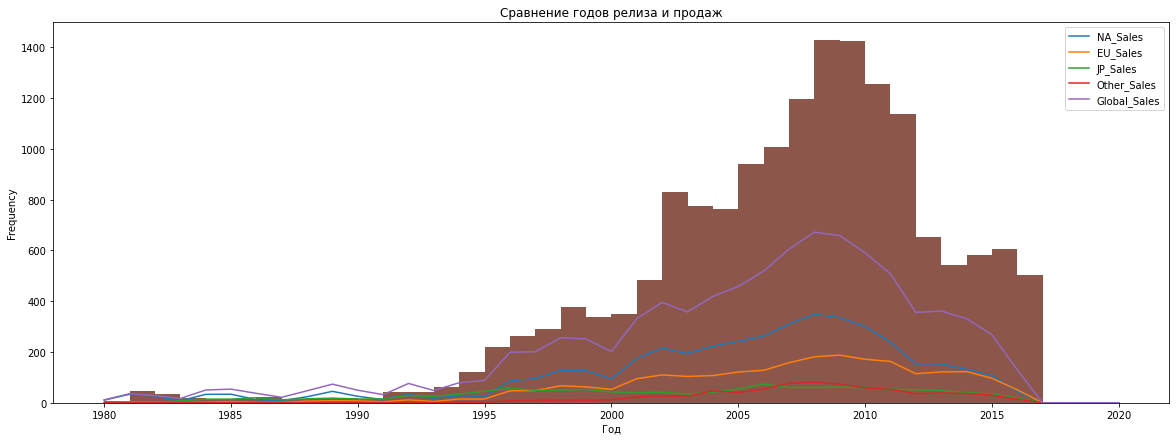

In [69]:
dynamics_by_region.plot(xlabel = 'Год', ylabel = 'Продажи, млн.')

df['Year_of_Release'].plot(kind = 'hist', bins = 40)

plt.title('Сравнение годов релиза и продаж')

Сравнив продажи и годы выпуска игр, мы можем найти взаимосвязь. Мы видим, что темпы продаж и количество игр примено совпадают. Бурный рост с середины девяностых до середины-конца нулевых с дальнейшим спадом и резким падением к 2016 году.

#Посмотрим на распределение оценок пользователей и критиков

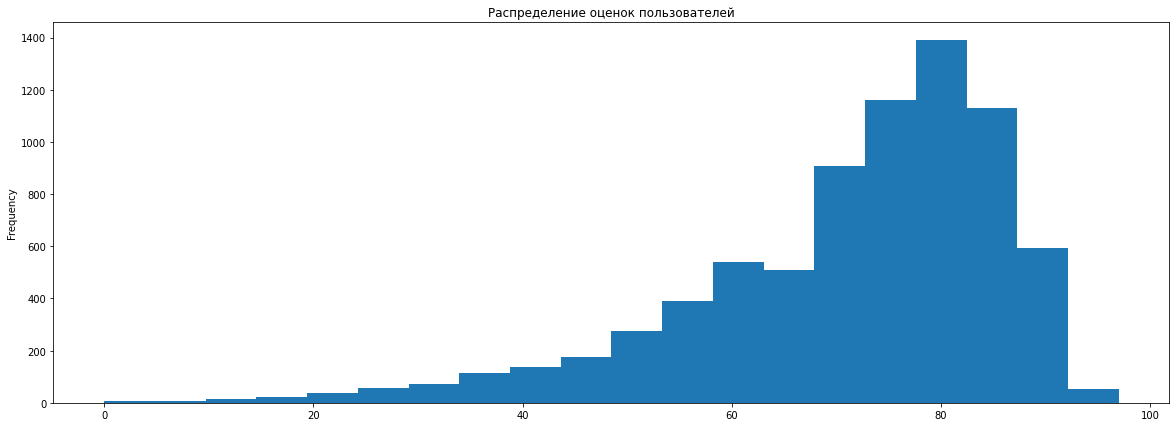

In [46]:
# распределение оценок пользователей
df['User_Score'].plot(kind='hist', 
                   title='Распределение оценок пользователей', bins=20)

Text(0.5, 1.0, 'Распределение оценок пользователей')

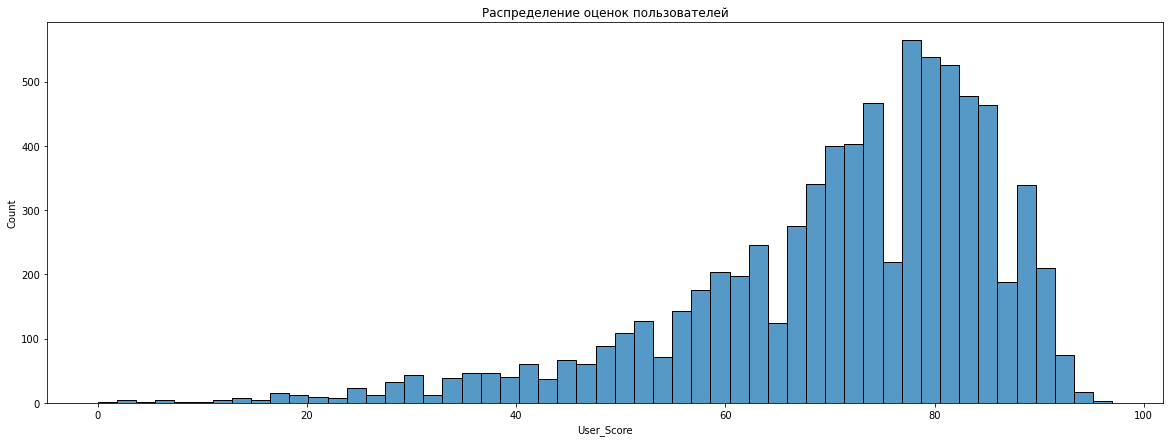

In [47]:
sns.histplot(df['User_Score'])
plt.title('Распределение оценок пользователей')

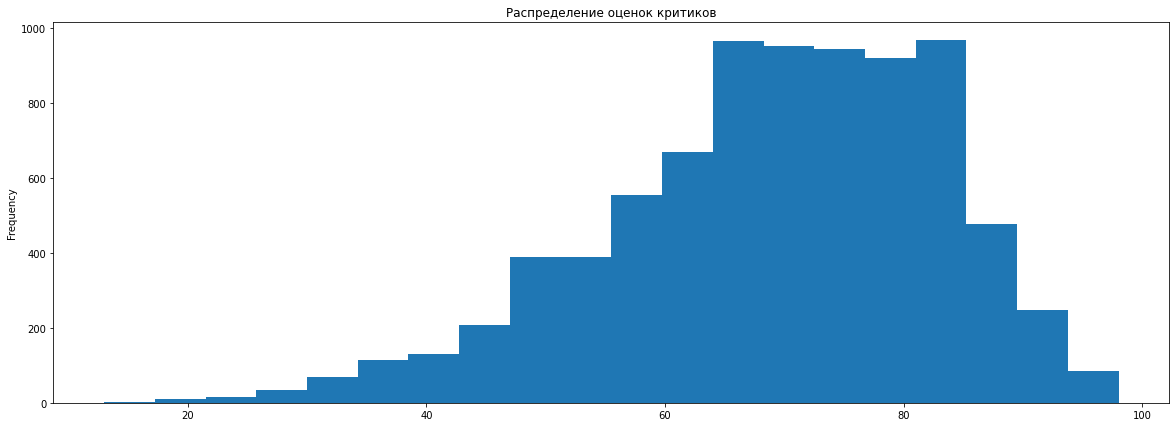

In [48]:
# распределение оценок критиков
df['Critic_Score'].plot(kind='hist', 
                     title='Распределение оценок критиков', bins=20)

Text(0.5, 1.0, 'Распределение оценок критиков')

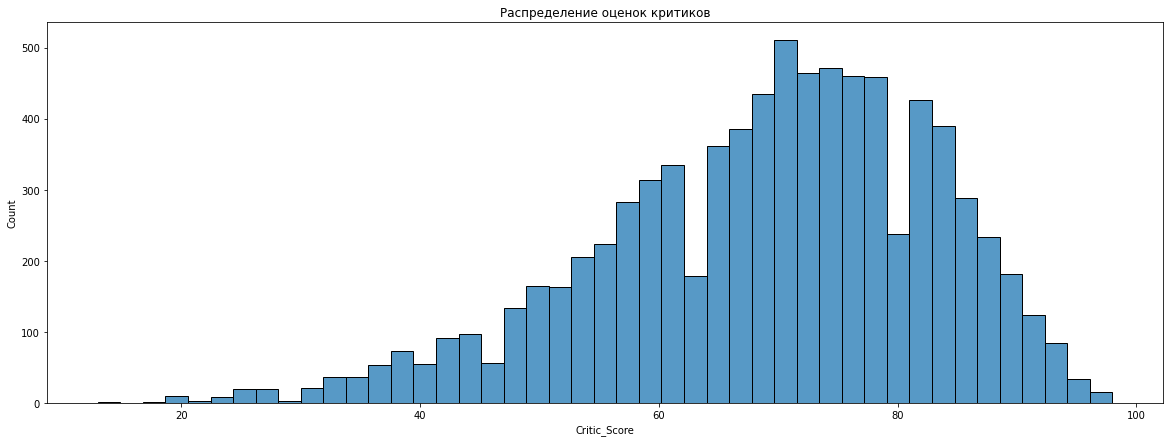

In [49]:
sns.histplot(df['Critic_Score'])
plt.title('Распределение оценок критиков')

Text(0.5, 1.0, 'Сравнение распределений оценок видеоигр')

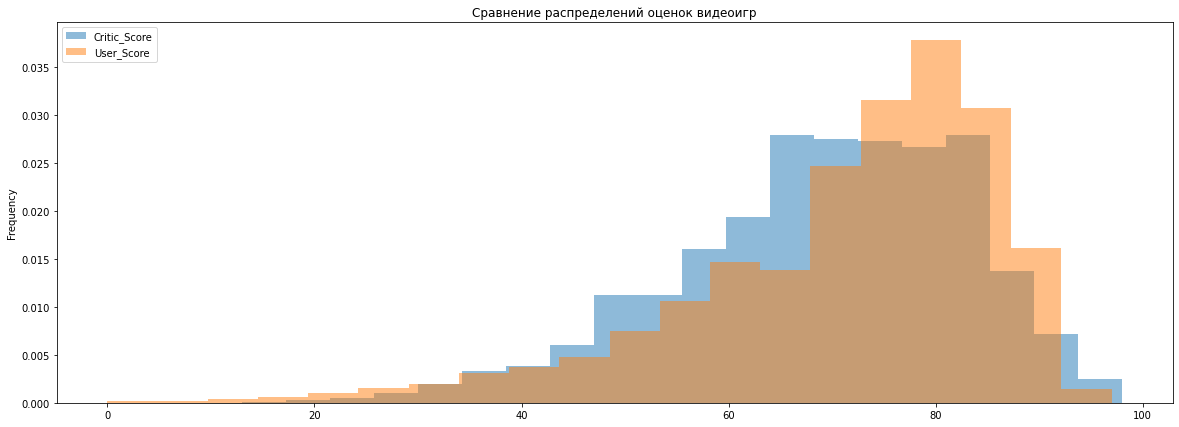

In [50]:
# сравнение
df['Critic_Score'].plot(kind='hist', 
                     alpha = 0.5,
                     bins=20,
                     density = True)


df['User_Score'].plot(kind='hist', 
                     alpha = 0.5,
                     bins=20,
                     density = True)
plt.legend(loc='upper left')
plt.title('Сравнение распределений оценок видеоигр')

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



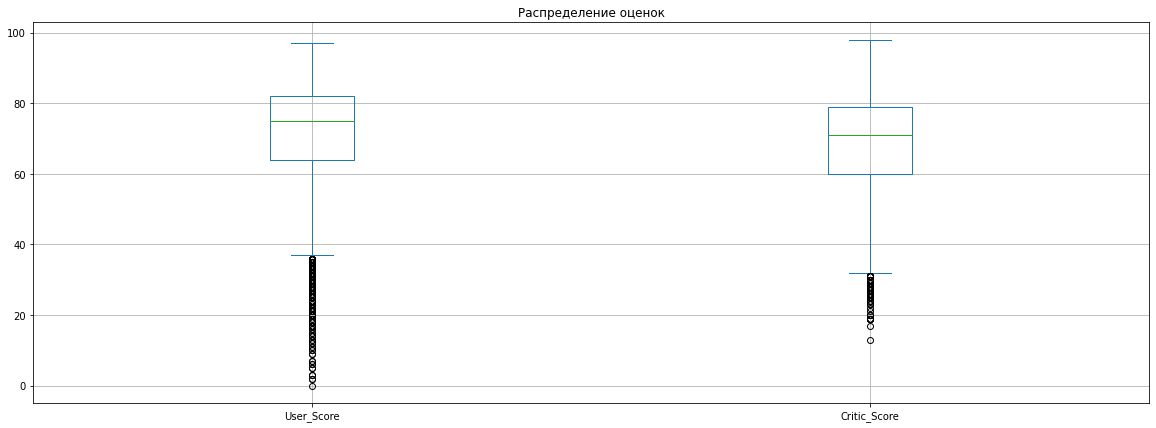

In [51]:
df[['User_Score', 'Critic_Score']].plot(kind='box',
                                        title='Распределение оценок', grid=True)

Краткий вывод
Исходя из графиков, можно предположить, что пользователи чаще склонны ставить высокие оценки, чем критики 

# Сравним оценки критиков и игроков для 10 самых продаваемых игр

In [77]:
scores_games = df[['Name', 'Critic_Score', 'User_Score']].head(15).set_index('Name')
scores_games 

,Critic_Score,User_Score
Name,,
Wii Sports,76.0,80.0
Super Mario Bros.,NaN,NaN
Mario Kart Wii,82.0,83.0
Wii Sports Resort,80.0,80.0
Pokemon Red/Pokemon Blue,NaN,NaN
Tetris,NaN,NaN
New Super Mario Bros.,89.0,85.0
Wii Play,58.0,66.0
New Super Mario Bros. Wii,87.0,84.0


Видим, что не везде у нас есть оценки

In [80]:
# удалим те игры, где оценок нет
scores_games = scores_games.dropna()

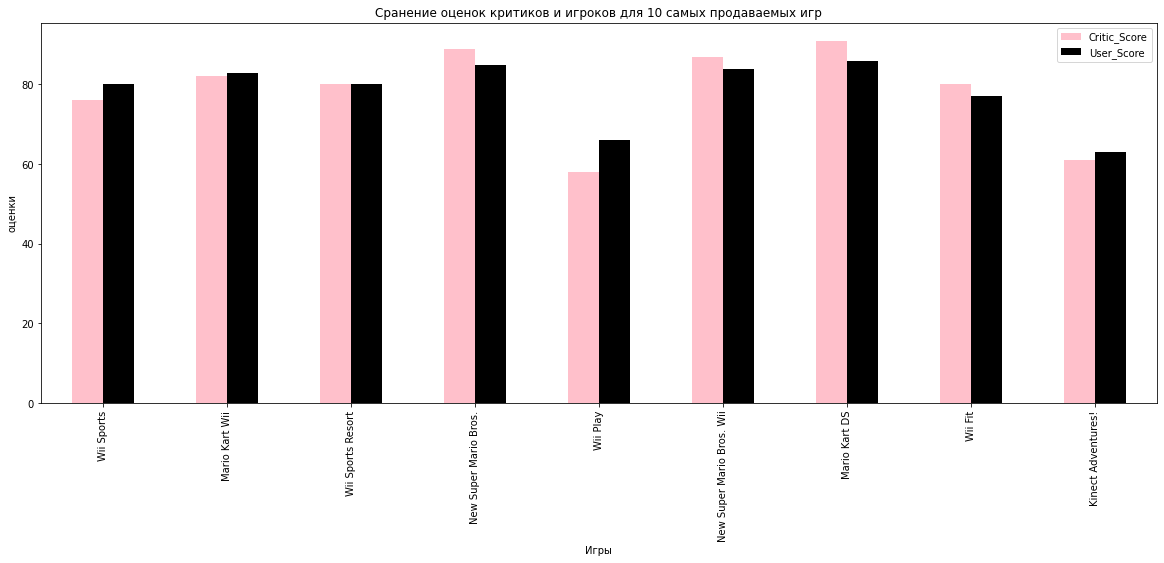

In [81]:
scores_games.plot(kind = 'bar', title = 'Сранение оценок критиков и игроков для 10 самых продаваемых игр', 
                  xlabel = 'Игры', ylabel = 'оценки', color = ['pink', 'black'])

Глядя на график, нельзя подтвердить гипотезу, что преобладание уровня оценок критиков или пользователей влияет на продажи данных игр

#Количество игр в разрезе платформ

In [41]:
games_by_platforms = df[['Name', 'Platform']].groupby('Platform').count()
games_by_platforms

,Name
Platform,
2600,133
3DO,3
3DS,520
DC,52
DS,2152
GB,98
GBA,822
GC,556
GEN,27


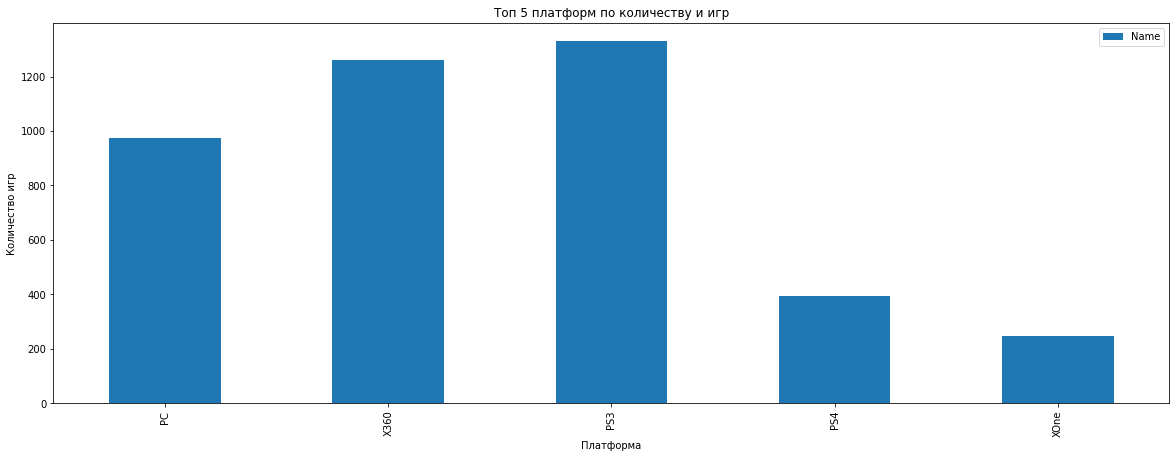

In [52]:
games_by_platforms.loc[['PC', 'X360', 'PS3', 'PS4', 'XOne']].plot(kind='bar', 
                                                                  title='Топ 5 платформ по количеству и игр',
                                                                  xlabel='Платформа',
                                                                  ylabel='Количество игр')

Видим, что самой популярной платформой является PS3

#Топ-5 жанров по продажам

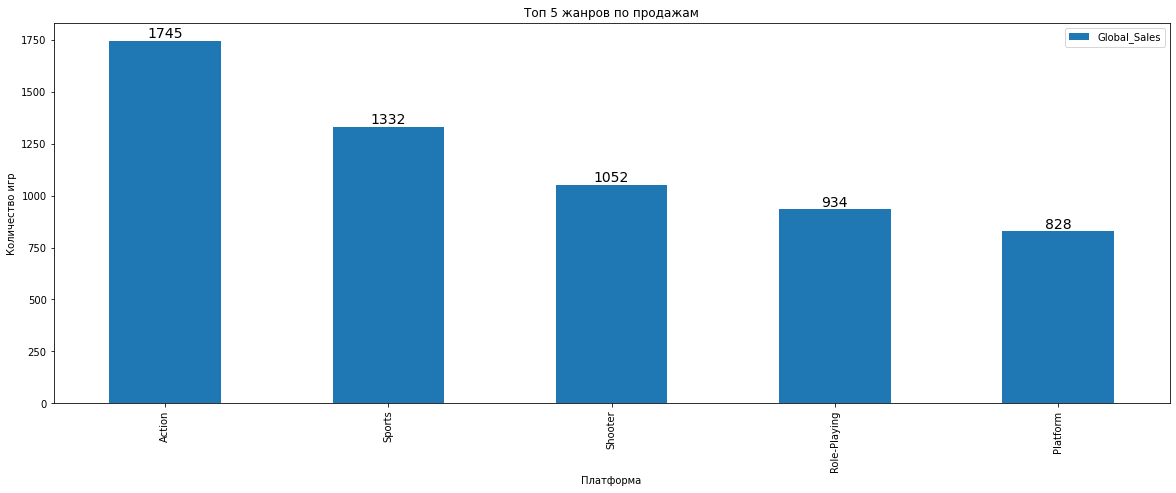

In [53]:
top5_genres = df[['Global_Sales', 'Genre']].groupby('Genre').sum().sort_values('Global_Sales', ascending=False).head(5)
top5_genres.plot(kind='bar', title='Топ 5 жанров по продажам',
                             xlabel='Платформа',
                             ylabel='Количество игр')
for i, val in enumerate(top5_genres.values):
    plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':14})

Самым продаваемым жанром является жанр Action

#Посмотрим на взаимосвязь оценок и продаж

(0.0, 40.0)

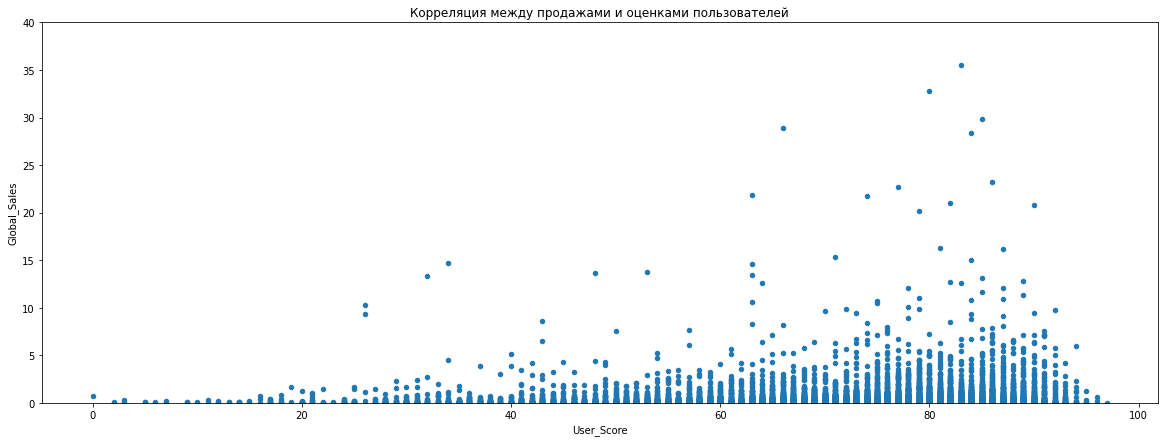

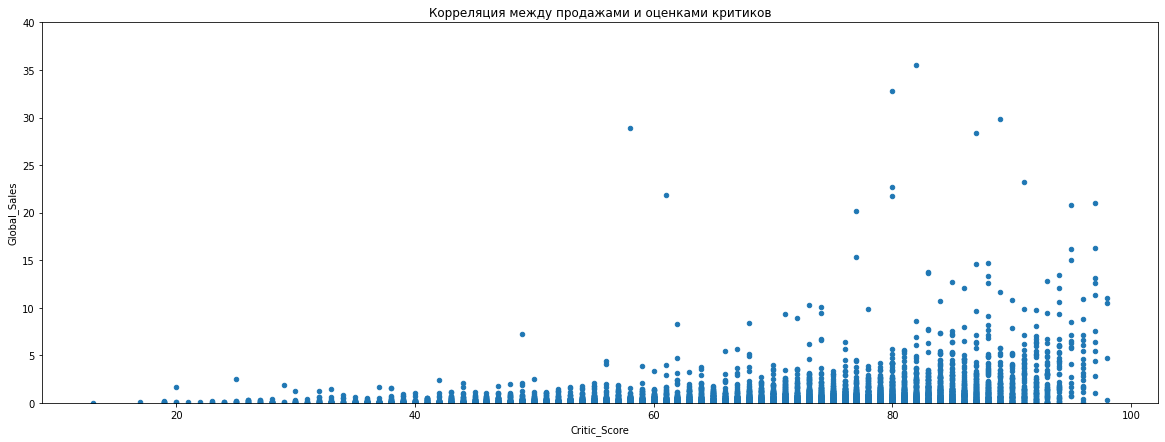

In [54]:
df.plot(kind='scatter', 
        x='User_Score', 
        y='Global_Sales', 
        title='Корреляция между продажами и оценками пользователей')
plt.ylim(0, 40)
df.plot(kind='scatter', 
        x='Critic_Score', 
        y='Global_Sales', 
        title='Корреляция между продажами и оценками критиков')
plt.ylim(0, 40)

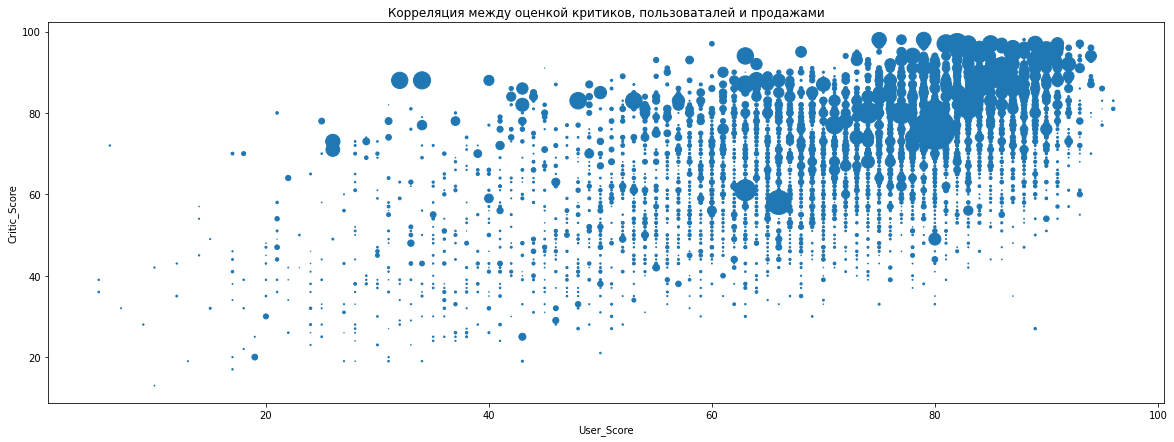

In [55]:
# добавим третью ось
df.plot(kind='scatter', 
        x='User_Score', 
        y='Critic_Score', 
        s=df['Global_Sales']*20,
        title='Корреляция между оценкой критиков, пользоваталей и продажами')

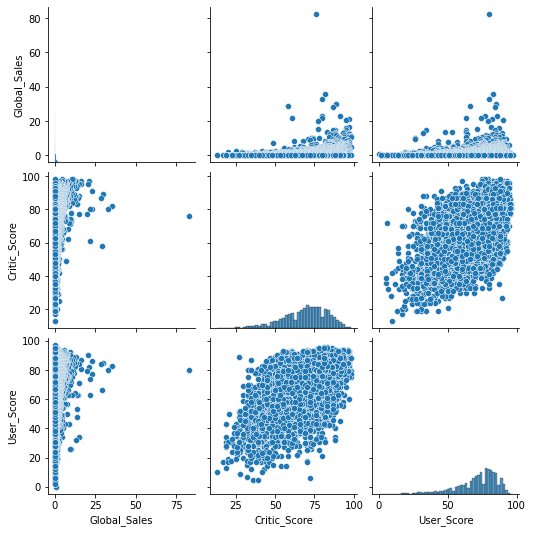

In [56]:
sns.pairplot(df[['Global_Sales', 'Critic_Score', 'User_Score']])

Вывод:
если упростить, то можно придти к выводу, что чем большую оценку получает игра, тем выше ее продажи. Конечно же бывают исключения

#Выведем информацию о топ-10 разработчиков по продажам

In [84]:
top_developers_df = df.groupby('Developer')[['Global_Sales']].sum()\
    .sort_values('Global_Sales', ascending=False).head(10)
    
top_developers_df

,Global_Sales
Developer,
Nintendo,531.71
EA Sports,175.38
EA Canada,142.32
Ubisoft,132.54
Rockstar North,119.47
Capcom,115.71
Ubisoft Montreal,108.31
Treyarch,103.16
EA Tiburon,96.12


In [57]:
top_developers_df.style.bar(align='mid')

,Global_Sales
Developer,
Nintendo,531.710000
EA Sports,175.380000
EA Canada,142.320000
Ubisoft,132.540000
Rockstar North,119.470000
Capcom,115.710000
Ubisoft Montreal,108.310000
Treyarch,103.160000
EA Tiburon,96.120000


Видим, что Nintendo имеет значительно более высокие продажи, чем все остальные разработчики

#Сравним оценки критиков игр для топ-10 крупнейших игровых платформ

In [29]:
top_platforms = df['Platform'].value_counts().sort_values(ascending=False).head(10)
top_platforms 

PS2     2161
DS      2152
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
Name: Platform, dtype: int64

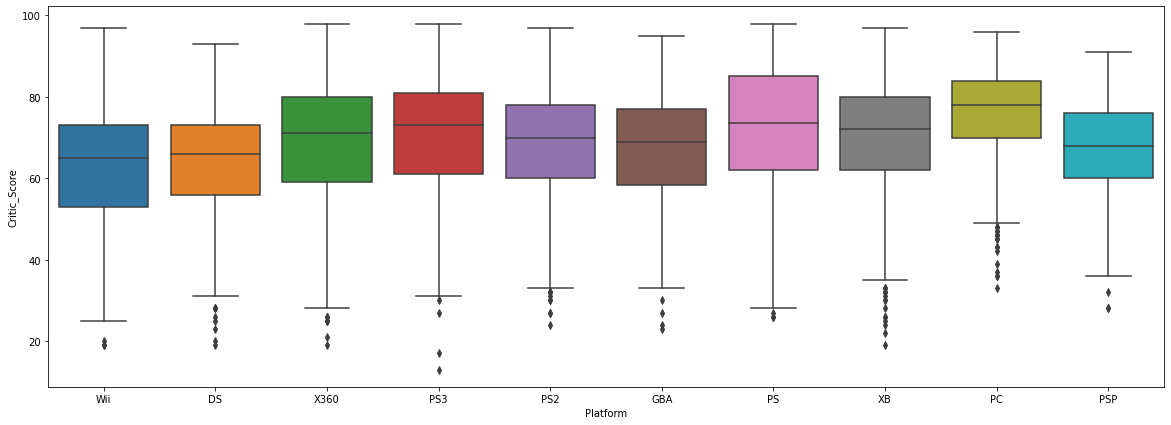

In [58]:
top_platforms = df['Platform'].value_counts().sort_values(ascending=False).head(10).index.values
sns.boxplot(x="Platform", y="Critic_Score", 
            data=df[df['Platform'].isin(top_platforms)])

Исходя из графика, мы видим, что в целом критики больше всего любят игры, которые выохиди на PS и PC

# Сравним оценки игроков для топ-10 крупнейших издателей

In [82]:
top_publishers = df['Publisher'].value_counts().head(10)
top_publishers

Electronic Arts                 1356
Activision                       985
Namco Bandai Games               939
Ubisoft                          933
Konami Digital Entertainment     834
THQ                              715
Nintendo                         706
Sony Computer Entertainment      687
Sega                             638
Take-Two Interactive             422
Name: Publisher, dtype: int64

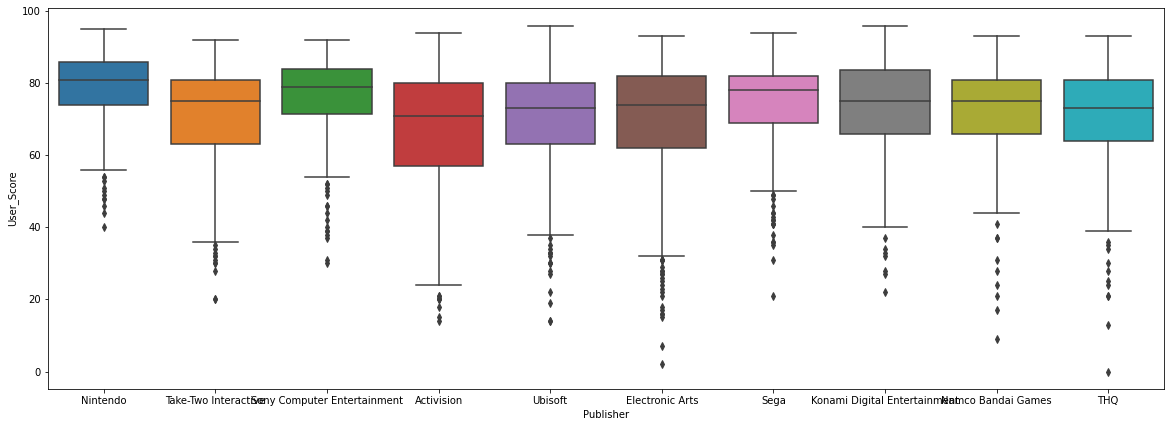

In [83]:
top_publishers = df['Publisher'].value_counts().head(10).index.values
sns.boxplot(x='Publisher', y='User_Score', 
            data=df[df['Publisher'].isin(top_publishers)])

Исходя из графика, мы видим, что в целом игроки больше всего любят игры Nintendo и Sony

#Сравним оценки критиков в разрезе жанров

In [59]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

data = []

for genre in df.Genre.unique():
    data.append(
        go.Box(y=df[df.Genre==genre].Critic_Score, 
               name=genre)
    )
iplot(data, show_link = False)

Исходя из графиков, мы видим, что в целом критикам больше нравятся спортивные симуляторы, РПГ и шутеры